In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Activation, Conv2D, MaxPool2D
from keras.models import Model, Sequential

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


4423680/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_labels = ['T-shirt' ,'Trousers', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

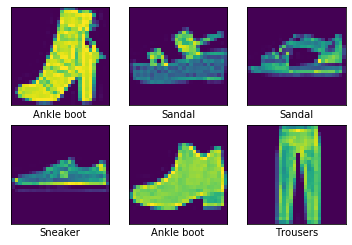

In [7]:
j = 11
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[j+i].reshape(28,28))
    plt.xlabel(class_labels[y_train[j+i]])

In [8]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
#build model
input_layer = Input(shape=(28,28))
flatten_layer = Flatten()(input_layer) #
dense_1 = Dense(1000, activation= 'relu')(flatten_layer)
dense_2 = Dense(500, activation = 'relu')(dense_1)
dense_3 = Dense(100, activation = 'tanh')(dense_2)
dense_4 = Dense(50, activation = 'relu')(dense_3)
output_layer = Dense(10,activation= 'softmax')(dense_4)

model_dense = Model(input_layer,output_layer)
model_dense.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
model_dense.summary()

In [ ]:
train_data = model_dense.fit(x = x_train, y = y_train_cat, batch_size= 32, epochs=50,validation_data=(x_test,y_test_cat))

In [ ]:
plt.subplot(2,1,1)
plt.plot(train_data.history['loss'])
plt.plot(train_data.history['val_loss'])
plt.subplot(2,1,2)
plt.plot(train_data.history['accuracy'])
plt.plot(train_data.history['val_accuracy'])

In [ ]:
model_dense.save('dense_model.h5')

In [ ]:
model_seq = Sequential()
model_seq.add(Flatten())
model_seq.add(Dense(1000,input_shape = (784,)))
model_seq.add(Activation('relu'))
model_seq.add(Dense(500))
model_seq.add(Activation('relu'))
model_seq.add(Dense(100))
model_seq.add(Activation('tanh'))
model_seq.add(Dense(50))
model_seq.add(Activation('relu'))
model_seq.add(Dense(10))
model_seq.add(Activation('softmax'))

model_seq.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

Convolutional

In [14]:
x_train_c = x_train[:,:,:,np.newaxis]
x_test_c = x_test[:,:,:,np.newaxis]
print(x_train_c.shape)

(60000, 28, 28, 1)


In [ ]:
input_layer_conv = Input(shape = (28,28,1))
conv_1 = Conv2D(32,3,strides=(1, 1), padding='same',activation = 'relu')(input_layer_conv)
conv_2 = Conv2D(32,3,strides=(1, 1), padding='same',activation = 'relu')(conv_1)
max_pool_1 = MaxPool2D(pool_size= (2,2))(conv_2)
conv_3 = Conv2D(16,3,strides=(1, 1), padding='same',activation = 'relu')(max_pool_1)
conv_4 = Conv2D(4,3,strides=(1, 1), padding='same',activation = 'relu')(conv_3)
conv_5 = Conv2D(1,3,strides=(1, 1), padding='same',activation = 'relu')(conv_4)
max_pool_2 = MaxPool2D(pool_size= (2,2))(conv_5)
flatten_layer = Flatten()(max_pool_2)
output_layer_conv = Dense(10,activation='softmax')(flatten_layer)

model_conv_2 = Model(input_layer_conv,output_layer_conv)
model_conv_2.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_conv_2.summary()

In [ ]:
train_data_conv2 = model_conv_2.fit(x = x_train_c, y = y_train_cat, batch_size= 32, epochs=50,validation_data=(x_test_c,y_test_cat))

In [ ]:
plt.subplot(2,1,1)
plt.plot(train_data_conv2.history['loss'])
plt.plot(train_data_conv2.history['val_loss'])
plt.subplot(2,1,2)
plt.plot(train_data_conv2.history['accuracy'])
plt.plot(train_data_conv2.history['val_accuracy'])

In [ ]:
model_conv_2.save('model_conv2.h5')

In [ ]:
j = 126
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i+j].reshape(28,28))
    pred = np.argmax(model_conv_2.predict(x_test_c[i+j:i+j+1]))
    plt.xlabel(class_labels[pred])

In [ ]:
i = 189
plt.rcParams["figure.figsize"] = (20,10)
count = 1
for j in range(i,i+3,1):
    plt.subplot(2,3,count)
    count +=1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[j].reshape(28,28))
for j in range(i,i+3,1):
    pred = model_conv_2.predict(x_test_c[j:j+1])
    plt.subplot(2,3,count)
    count +=1
    plt.bar(class_labels,pred[0,:])

In [ ]:
pred = model_conv_2.predict(x_test_c[0:100])
pred_class = np.argmax(pred,axis = 1)
wrong = pred_class != y_test[0:100]
plt.subplot(1,2,1)
plt.imshow(x_test[0:100][wrong][0])
plt.xlabel(class_labels[y_test[0:100][wrong][0]])
plt.subplot(1,2,2)
plt.bar(class_labels,pred[wrong][0])